For this homework assignment, you are to submit a **single** ipynb file. Use the provided ipynb file to keep the same formatting for each question. In the ipynb file name, replace "NAME" with your first name. Unless otherwise specified, present your code as well as the output in your report. It is the student's responsibility to make sure the ipynb file runs when submitted. This assignment is worth ***53*** points.

# 1: k-Means Clustering *(25 points)*

Today we will look at the Labeled Faces in the Wild data set. There are 3,023 images, each $87 \times 65$ pixels large, belonging to 62 different people. We require that for each person, there are at least 20 pictures of them. Our hope is to make a model that can predict, just given a picture who that person might be.

As you run this, you may notice some familiar names and faces. In particular, the bottom row of images shows two images of George W. Bush. We include multiple photos of the same person so that our model can start to recognize/cluster these images together to identify the correct person.

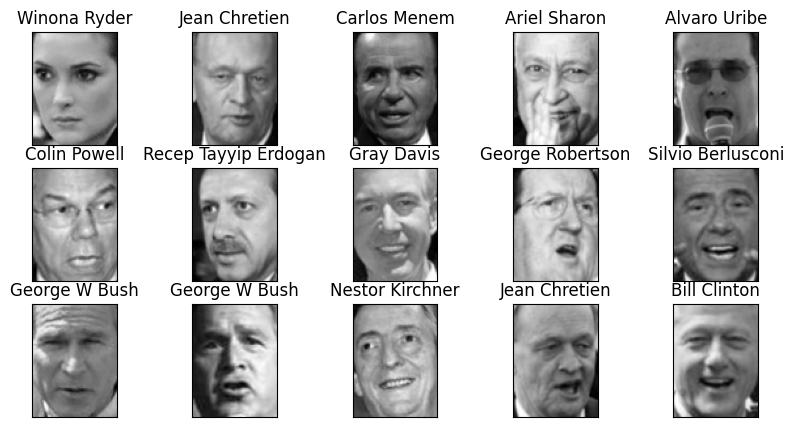

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(3, 5, figsize=(10, 5),
  subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image,cmap="gray")
  ax.set_title(people.target_names[target])

We want to know how many people are represented in this data set and how many images of them are in the data set. We will separate the people using bins and Use the `bincount` function inside of `NumPy` to determine how many images appear in each bin. (The output labels are stored under `people.target`). Is this a well balanced data set? *(2 points)*

In [10]:
import numpy as np
np.bincount(people.target)

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24])

This is not a well balaceded data set becuase some people ony have 20 images while others have over 500.

How many people are represented in this data set? *(1 point)*

In [12]:
np.bincount(people.target).shape

(62,)

62 people

Perform PCA on the data set: *(5 points)*

*   Build the model with 100 components, set the random state to 0 and set `whiten=True`
*   `fit_transform` on `people.data` and then `transform` on `people.data`.



In [17]:
from sklearn.decomposition import PCA
pca_pic=PCA(n_components=100, random_state=0, whiten=True)
pca_train=pca_pic.fit_transform(people.data)
pca_test=pca_pic.transform(people.data)


Apply the $k$-Means Clustering algorithm to your transformed data set using 30 clusters and a random state of 0. *(5 points)*

In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=30, random_state=0).fit(pca_train)

Use the `predict` method to determine how many images got placed in each cluster/bin. (Recall that this is unsupervised learning, so we predict on the same data set - we only have inputs!) *(3 points)*

In [23]:
km_predict=km.predict(pca_test)
np.bincount(km_predict)

array([107,  95,   5,  98, 186, 153, 105,  61, 132,   1,  80,  59, 126,
       137, 155,  89, 109, 136,  15, 194,  94, 146, 160,  30, 124,  21,
        69, 154,  96,  86])

Recall from earlier that each person had at least 20 images in the data set. We used 30 clusters, but there were more than 30 people in our data set. So these values you just computed will most likely be bigger than 20 because more than one person is clustered together. Do any clusters stick out as "something wrong may have happened"? *(2 points)*

Yes, some clusters have fewer than 20 immages, with one have only 1 image.

We can use the cluster centers to create images to see what the "center image" looks like for each bin. Use 30 subplots as we have done previously to look at the cluster centers.

Since we did PCA to our data set, we will have to undo it to return back to the original image. The sample code below is an example of how we can do this. *(5 points)*

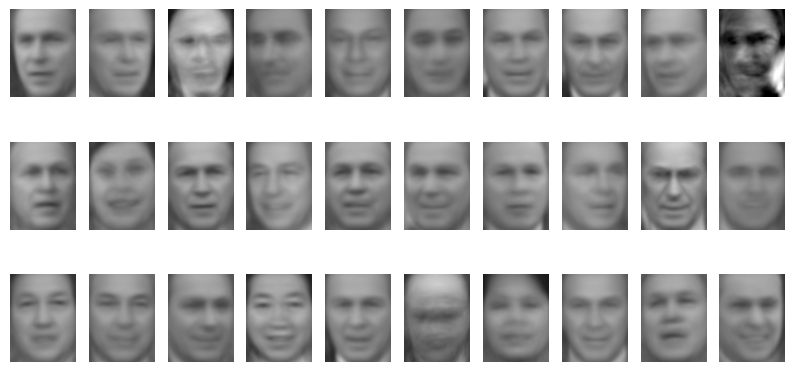

In [26]:
# AX and CENTER need to be readjusted to your variables you are using
CENTER = km.cluster_centers_
fig, axes = plt.subplots(3,10,figsize=(10,5))
axes = axes.ravel()

for i in range(30):
  axes[i].imshow(pca_pic.inverse_transform(CENTER[i]).reshape(image_shape),vmin=0, vmax=1,cmap="gray")
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.1)
plt.show()

Notice that while these images are not really discernable as people, you can still tell features for most of them. In fact, these are very smooth faces. Because we're taking an average and we performed PCA, we should have expected smooth faces. Can you try and understand why these images are representing clusters? For example are there different features that are prevalent. For example, some seem to be picking up on a shirt collar or not. *(2 points)*

These images are representing clusters because each bin is grouped based on shared characteristics of the binned images, such as face direction, facial expression, and identifiable clothing, where the grouped images share a certain amount of the characteristics and the resulting image is the "center" between them..

#2: Agglomerative Clustering *(18 points)*

Let us see how the agglomerative clustering works on this data set. Use 30 clusters again and apply the `fit_predict` method inputting the input data set. *(6
 points)*

In [37]:
from sklearn.cluster import AgglomerativeClustering
wArd = AgglomerativeClustering(n_clusters=30)
wArd = wArd.fit_predict(pca_train)

Compute the bin count again for each of the clusters. Are the clusters more representative of an even distribution? *(3 points)*

In [38]:
np.bincount(wArd)

array([324,  88, 113, 124, 449,  95,  98,  40,  96, 158,  69, 172,  62,
       134,  65,  48,  41,  45, 151,  23,  12,  39,  42,  20,  74,  54,
        25, 204,  46, 112])

The clusters are still very unevenly distributed because the low value bins have values around 12 and 20 while the high value bins have over 100 (the highest being over 400).

Since we have two clusterings, let us see what our adjusted rand index is between these two cluster sets. In order to find the ARI, use the function `adjusted_rand_score` where we need to input both sets of labels. *(3 points)*

In [39]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(wArd,km_predict)

0.08019387305914882

Is this a good or bad ARI? *(2 points)*

This is a bad ARI because the value is close to 0, indicating that at least one of the clusterings were close to a random assignment and that they have very few similarities between them.

Create a dendogram using the `ward` function. *(3 points)*

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [52.5, 52.5, 80.0, 80.0],
  [30.0, 30.0, 66.25, 66.25],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [48.125, 48.125, 102.5, 102.5],
  [10.0, 10.0, 75.3125, 75.3125],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [183.75, 183.75, 222.5, 222.5],
  [141.25, 141.25, 203.125, 203.125],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [262.5, 262.5, 292.5, 292.5],
  [245.0, 245.0, 277.5, 277.5],
  [172.1875, 172.1875, 261.25, 261.25],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [355.0

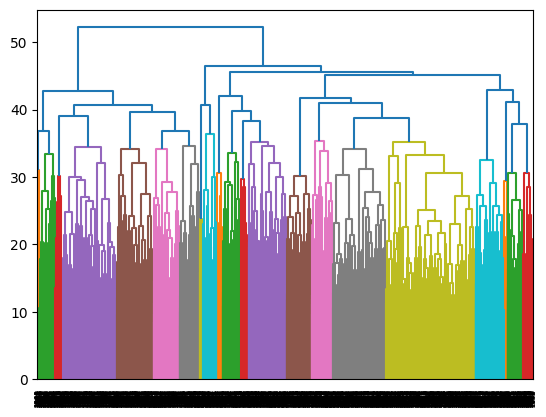

In [41]:
from scipy.cluster.hierarchy import dendrogram, ward
dendrogram(ward(pca_train))

Looking at the dendrogram, what might be the best number of clusters to pick? *(1 point)*

The best number of clusters to pick might be 21 so that we can reduce the the height of the jumps needed to cluster.

# 3: Algorithms *(10 points)*

In order to do $k$-Means Clustering, we need to be able to compute cluster centers. Write a function that inputs arrays of values all belonging to the same cluster. Have the function compute the center. *(5 points)*

In [3]:
import numpy as np

def mean_loop(x):
    centr=[]
    for i in range(0,x[0].shape[0]):
      v=[]
      for T in range(0,x.shape[0]):
        v.append(x[T][i])
      centr.append(np.mean(v))
    return centr

In [4]:
#You can test your function using the data set we used in the lecture notes!
classVal=np.array([[8,9,7],[20,21,22],[26,22,15],[10,12,2],[19,23,21]])
mean_loop(classVal)

[np.float64(16.6), np.float64(17.4), np.float64(13.4)]

In order to do Agglomerative Clustering, we need to be able to find the lengths between a point and all other points in the space. Create a distance matrix representing the length from all points to all other points. *(5 points)*

In [10]:
def dist_mat(y):
  q=y
  m=np.zeros((y.shape[0],q.shape[0]))
  for i in range(0,y.shape[0]):
    for t in range(0,q.shape[0]):
      val=0
      for z in range(0,y[0].shape[0]):
        point=y[i][z]-q[t][z]
        val=val+point**2
      m[i][t]=np.sqrt(val)
  return m

In [12]:
#You can test your function using the data set we used in the lecture notes!
Points=np.array([[1,2],[6,3],[1,4],[8,2],[4,1]])
dist_mat(Points)

array([[0.        , 5.09901951, 2.        , 7.        , 3.16227766],
       [5.09901951, 0.        , 5.09901951, 2.23606798, 2.82842712],
       [2.        , 5.09901951, 0.        , 7.28010989, 4.24264069],
       [7.        , 2.23606798, 7.28010989, 0.        , 4.12310563],
       [3.16227766, 2.82842712, 4.24264069, 4.12310563, 0.        ]])